<a href="https://colab.research.google.com/github/Kaviyavb/Brainwave_Matrix_Intern/blob/main/intern2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy pandas nltk textblob vaderSentiment matplotlib seaborn wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tweepy
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon (1).csv


In [ ]:
import pandas as pd

# Replace with your exact filename if different
df = pd.read_csv("training.1600000.processed.noemoticon (1).csv", encoding='latin-1', header=None)

# Assign column names based on dataset documentation
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

# Keep only the relevant columns
df = df[['text', 'target']]

# Map sentiment labels: 0 = Negative, 4 = Positive
df['target'] = df['target'].map({0: 'Negative', 4: 'Positive'})

df.head()



,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the missing resource


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", str(text))   # Remove URLs, mentions, hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())             # Lowercase, remove special characters
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function
df['VADER_Sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Show result
df[['cleaned_text', 'VADER_Sentiment']].head()


,cleaned_text,VADER_Sentiment
0,thats bummer shoulda got david carr third day,Negative
1,upset cant update facebook texting might cry r...,Negative
2,dived many times ball managed save rest go bounds,Positive
3,whole body feels itchy like fire,Negative
4,behaving im mad cant see,Negative


/tmp/ipython-input-12-467240813.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VADER_Sentiment', palette='Set2')


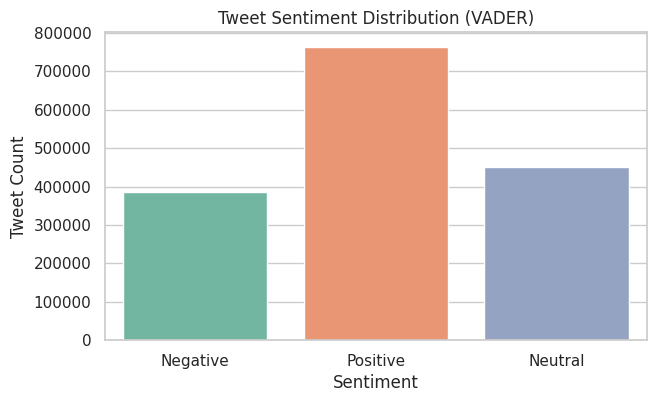

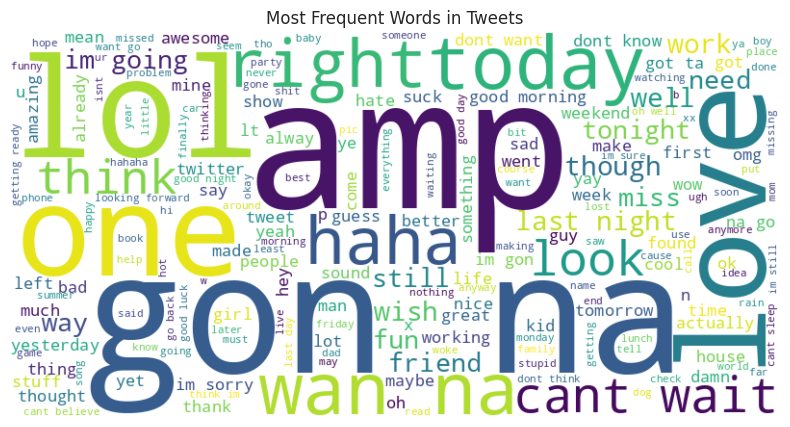

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='VADER_Sentiment', palette='Set2')
plt.title("Tweet Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()
from wordcloud import WordCloud

text_all = ' '.join(tweet for tweet in df['cleaned_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Tweets")
plt.show()


In [ ]:
# Save results to CSV
df.to_csv("sentiment140_results.csv", index=False)

# Download file in Colab
from google.colab import files
files.download("sentiment140_results.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>